For this assignment, the aim is to perform classification on a dataset, using two main strategies 
for classification.  One major strategy is a decision tree classifier, and the other being performed
is a k-Nearest Neighbors (kNN) classification.  After those classifiers are run, the same model will
be tried with a 5-fold cross-validation.  For this programming assignment, the 
Obesity dataset will be used again. Our classification of interest is predicting if the reported obesity 
rates are above or below the median, using reported values relating to activity and diet attributes
for that particular instance. We will evaluate the results of the models using the accuracy
statistics provided within the scikit-learn packages in Python.

The Obesity Data dataset is formally titled "CDC Data: Nutrition, Physical Activity, & Obesity" and is a dataset 
generated from the Behavioral Risk Factor Surveillance System of percentages of the population estimated to be 
engaged in certain activities, behaviors, or classifications relating to weight, physical activity, and dietary 
habits based on survey results gathered by the US Centers for Disease Control (CDC).  The data reported are annual 
statistics for the weight classification questions, and bi-annual for the other question variables.  These data 
points were reported by state/territory and nationwide, from 2011 to 2016.
gathered along with the numerical data are categorical breakouts of the question responses both overall, 
and by gender, age bracket, income bracket, race/ethnicity and edcational attainment level.  This dataset was found 
on Kaggle, posted by community member spittman1248, at 
https://www.kaggle.com/spittman1248/cdc-data-nutrition-physical-activity-obesity (Pittman, 2018)

In [1]:
#import all the packages used throughout the assignment

import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus 
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, KFold, cross_val_score


In [2]:
#Load the dataset

ObesityData = pd.read_csv(r'C:\Users\Mike\Documents\Grad School 2021\DSC-607 Data Mining\Module 3\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

ObesityData.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [3]:
#Eliminate duplicated dimensions and categories that aren't of interest

ObesityData2 = ObesityData.drop(['YearStart','LocationDesc','Class','Data_Value_Unit','Data_Value_Type',
                                 'Data_Value_Alt','Data_Value_Footnote_Symbol','Data_Value_Footnote',
                                 'Sample_Size','ClassID','TopicID','QuestionID','LocationID',
                                 'StratificationCategory1','Stratification1','StratificationID1',
                                 'StratificationCategoryId1','GeoLocation','Low_Confidence_Limit',
                                 'High_Confidence_Limit ','Age(years)','Education','Total','Income',
                                 'Race/Ethnicity','DataValueTypeID'], axis=1)

ObesityData3 = ObesityData2[ObesityData2['Gender'] == 'Male'] #Select only the values for male respondents

ObesityData3 = ObesityData3[ObesityData3['LocationAbbr'] != 'US']  #Eliminate national-level aggregation

#Pivot dataset to see data values by question
ObesityData4 = ObesityData3.pivot(index =['LocationAbbr','YearEnd'],
                                  columns = 'Question', values = 'Data_Value') 

ObesityData4



Question              Percent of adults aged 18 years and older who have an overweight classification  \
LocationAbbr YearEnd                                                                                    
AK           2011                                                  45.3                                 
             2012                                                  44.4                                 
             2013                                                  43.4                                 
             2014                                                  40.1                                 
             2015                                                  42.8                                 
...                                                                 ...                                 
WY           2012                                                  46.1                                 
             2013                                                  43.2                                 
             2014                                                  41.7                                 
             2015                                                  42.1                                 
             2016                                                  42.7                                 

Question              Percent of adults aged 18 years and older who have obesity  \
LocationAbbr YearEnd                                                               
AK           2011                                                  28.0            
             2012                                                  25.9            
             2013                                                  29.2            
             2014                                                  29.3            
             2015                                                  29.3            
...                                                                 ...            
WY           2012                                                  22.6            
             2013                                                  28.2            
             2014                                                  29.7            
             2015                                                  30.1            
             2016                                                  28.2            

Question              Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)  \
LocationAbbr YearEnd                                                                                                                                                                                                         
AK           2011                                                  58.4                                                                                                                                                      
             2012                                                   NaN                                                                                                                                                      
             2013                                                  54.7                                                                                                                                                      
             2014                                                   NaN                                                                                                                                                      
             2015                                                  58.1                                                                                                                                          

In [4]:
#Not possible to predict a target value with missing predictor values.  Drop all the missing rows.
#Has the effect of eliminating the even-number years

ObesityData4 = ObesityData4.dropna()
ObesityData4.describe()  #Generate summary statistics for the data of interest.

Question,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults aged 18 years and older who have obesity,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who engage in no leisure-time physical activity,Percent of adults who report consuming fruit less than one time daily,Percent of adults who report consuming vegetables less than one time daily
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.454194,28.876774,52.193548,22.510968,33.372258,33.716774,24.794839,44.704516,26.063226
std,1.886632,3.474206,5.070460,3.647461,4.497077,4.084717,4.089070,5.034818,3.651703
min,34.900000,17.600000,38.100000,10.100000,20.400000,14.400000,15.900000,35.100000,18.600000
25%,40.200000,26.600000,48.900000,20.000000,30.450000,31.300000,22.250000,40.800000,23.300000
50%,41.500000,29.000000,52.700000,22.600000,34.100000,33.700000,24.400000,44.500000,25.800000
75%,42.750000,31.000000,55.900000,24.800000,36.350000,36.250000,27.200000,47.950000,28.550000
max,46.800000,37.400000,63.900000,32.100000,44.100000,43.100000,42.800000,57.600000,36.500000


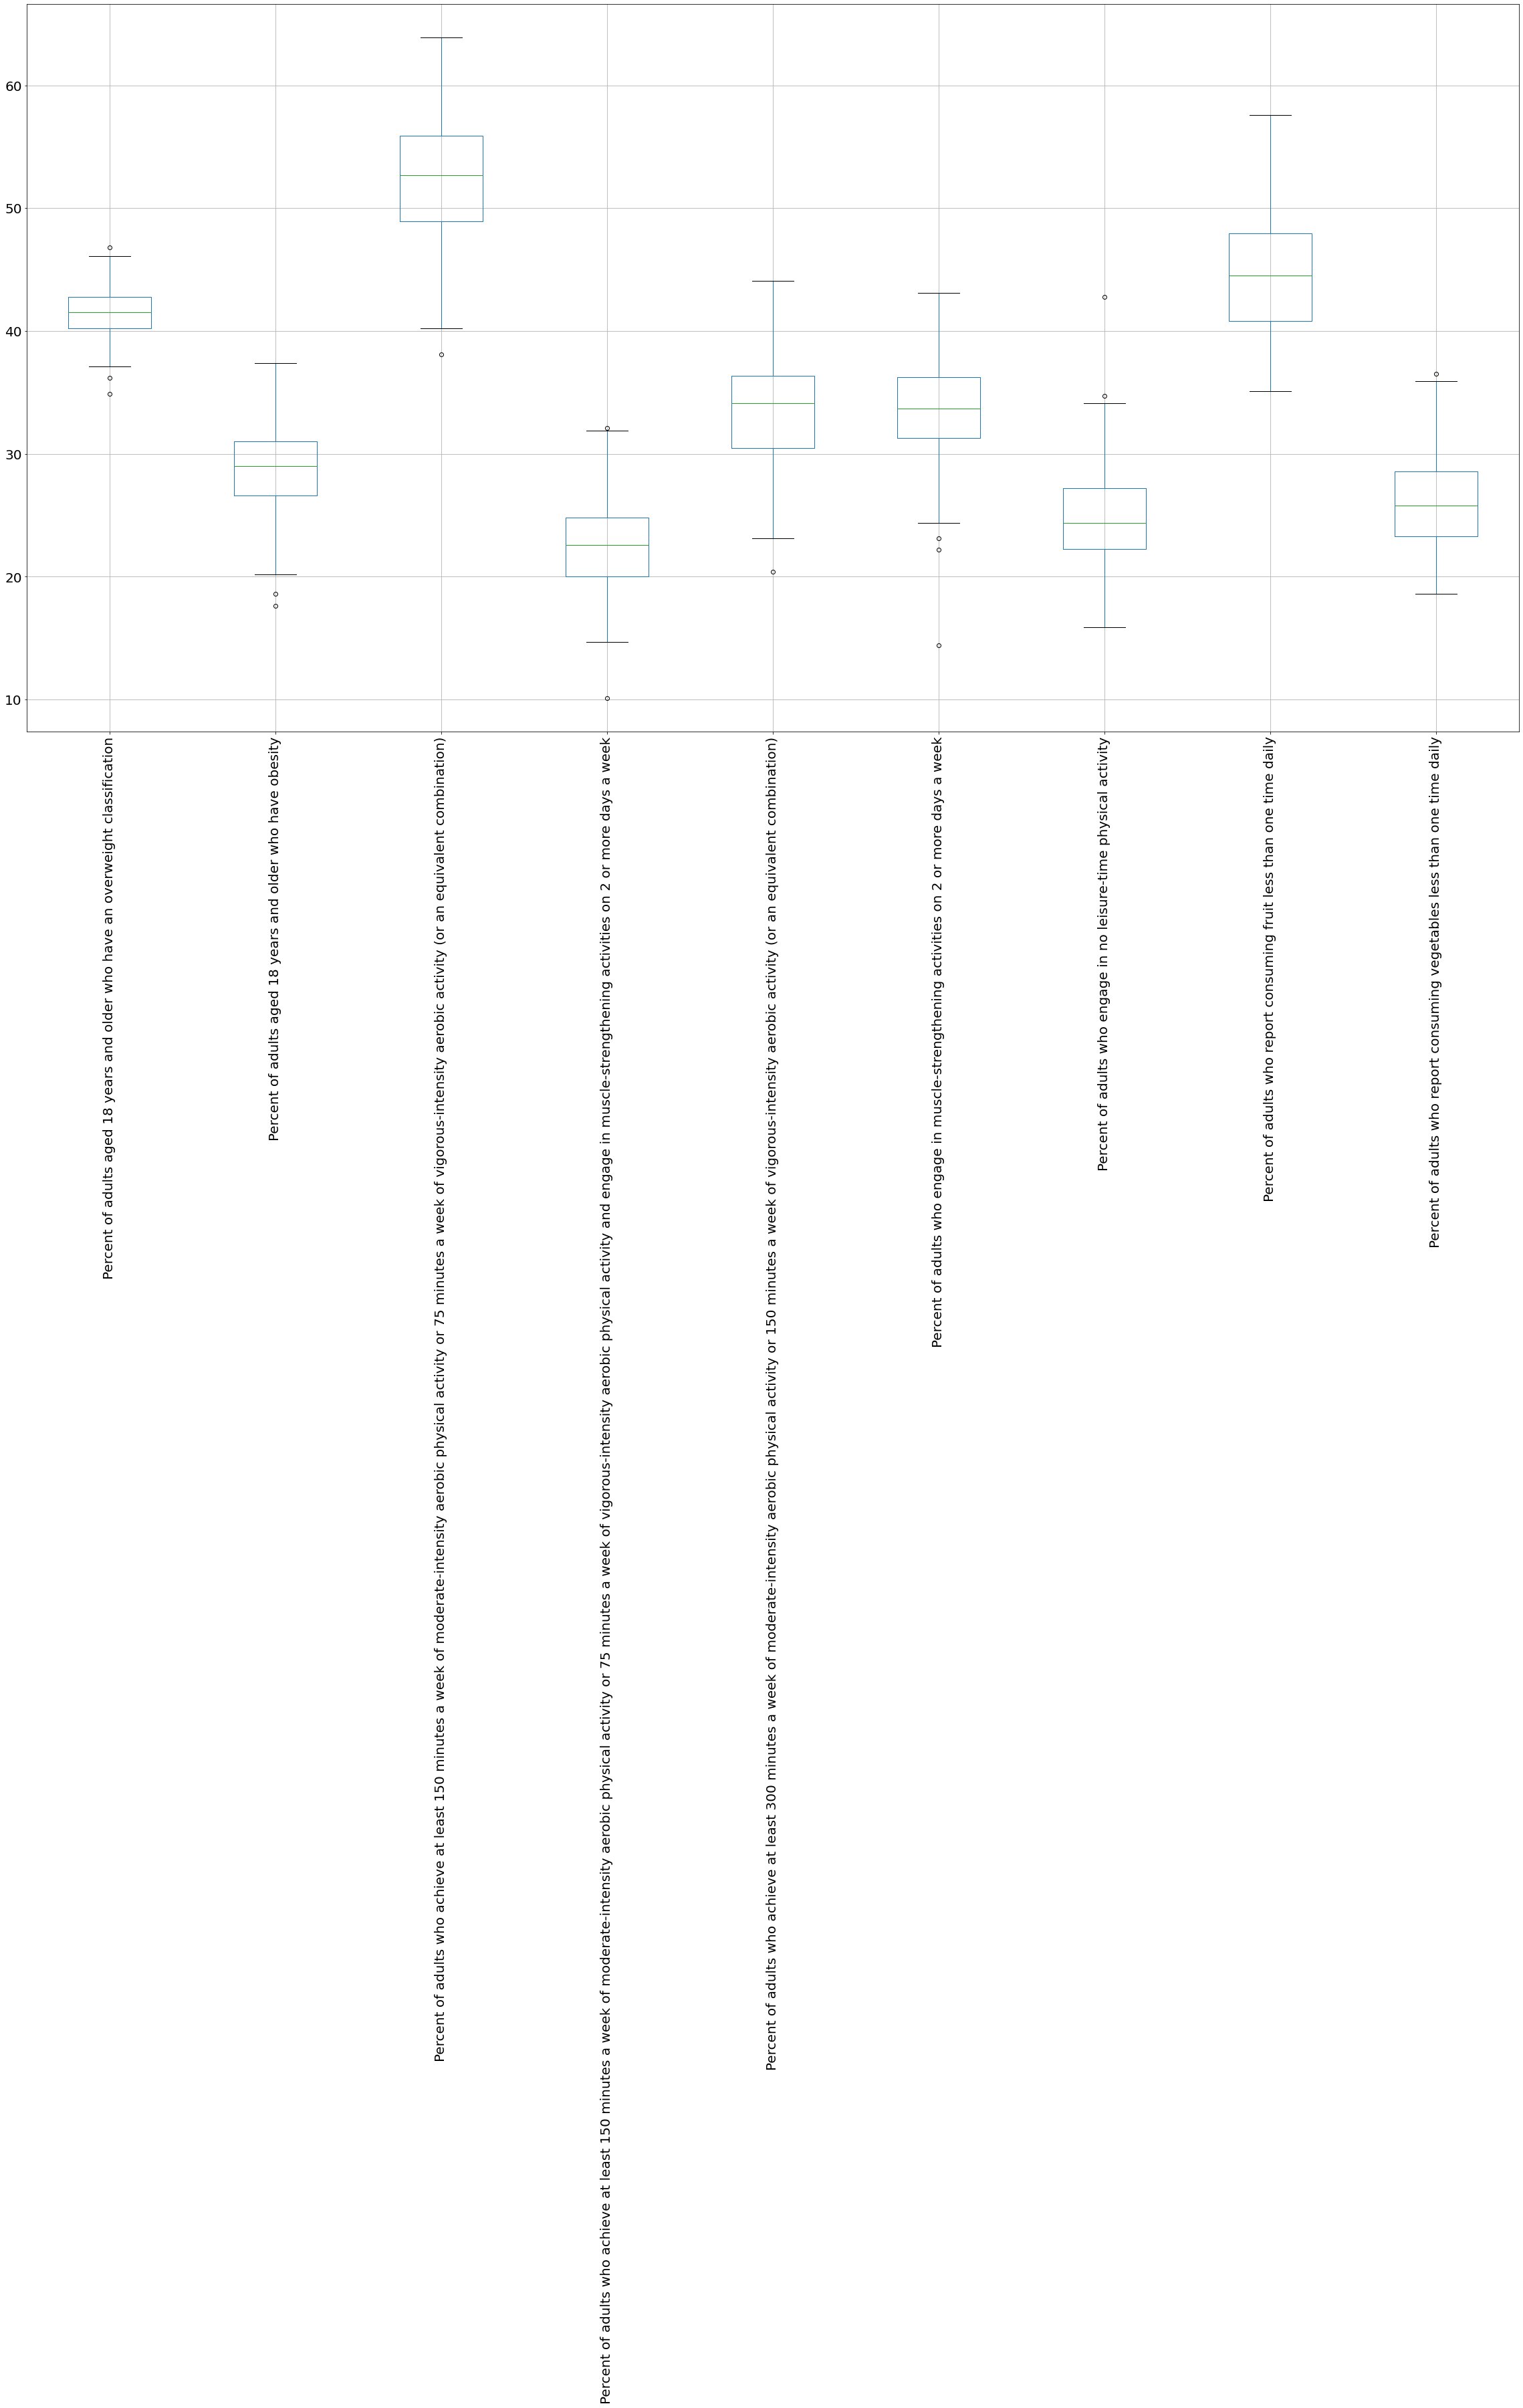

In [5]:
Boxplot_by_question = ObesityData4.boxplot(figsize = (40,20), 
                                                rot = 90, fontsize = 20)

# Look to confirm that all of the attributes are in the 0-100 range

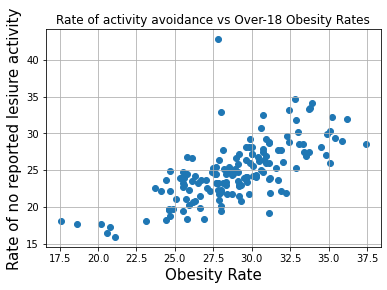

In [6]:
#Scatterplot to see if there's a relationship between a much-less active lifestyle and obesity rates
#There is an overall trend that shows higher rates of obesity relating to higher rates of inactive people

fig, ax = plt.subplots()
ax.scatter(ObesityData4['Percent of adults aged 18 years and older who have obesity'], ObesityData4['Percent of adults who engage in no leisure-time physical activity'])

ax.set_xlabel('Obesity Rate', fontsize=15)
ax.set_ylabel('Rate of no reported lesiure activity', fontsize=15)
ax.set_title('Rate of activity avoidance vs Over-18 Obesity Rates')

ax.grid(True)

plt.show()

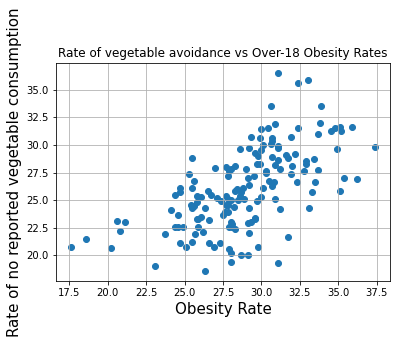

In [7]:
#Scatterplot to see if there's a relationship between a eating choices and obesity rates
#A wide range, but the plot shows higher rates of obesity with higher rates of low vegetable consumption
fig2, ax2 = plt.subplots()
ax2.scatter(ObesityData4['Percent of adults aged 18 years and older who have obesity'], ObesityData4['Percent of adults who report consuming vegetables less than one time daily'])

ax2.set_xlabel('Obesity Rate', fontsize=15)
ax2.set_ylabel('Rate of no reported vegetable consumption', fontsize=15)
ax2.set_title('Rate of vegetable avoidance vs Over-18 Obesity Rates')

ax2.grid(True)

plt.show()

In [8]:
#Time to apply a label to the data instances based on 'Percent of adults aged 18 years and older who have Obesity'
#Label criteria is simply if the value is above or below the median value.

Median_Obesity = ObesityData4['Percent of adults aged 18 years and older who have obesity'].median()

ObesityData4 = ObesityData4.assign(Obesity_Over_Median = ObesityData4['Percent of adults aged 18 years and older who have obesity']> Median_Obesity)

ObesityData4

Question              Percent of adults aged 18 years and older who have an overweight classification  \
LocationAbbr YearEnd                                                                                    
AK           2011                                                  45.3                                 
             2013                                                  43.4                                 
             2015                                                  42.8                                 
AL           2011                                                  39.0                                 
             2013                                                  40.8                                 
...                                                                 ...                                 
WV           2013                                                  38.7                                 
             2015                                                  39.8                                 
WY           2011                                                  42.6                                 
             2013                                                  43.2                                 
             2015                                                  42.1                                 

Question              Percent of adults aged 18 years and older who have obesity  \
LocationAbbr YearEnd                                                               
AK           2011                                                  28.0            
             2013                                                  29.2            
             2015                                                  29.3            
AL           2011                                                  32.3            
             2013                                                  30.9            
...                                                                 ...            
WV           2013                                                  35.4            
             2015                                                  37.4            
WY           2011                                                  26.1            
             2013                                                  28.2            
             2015                                                  30.1            

Question              Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)  \
LocationAbbr YearEnd                                                                                                                                                                                                         
AK           2011                                                  58.4                                                                                                                                                      
             2013                                                  54.7                                                                                                                                                      
             2015                                                  58.1                                                                                                                                                      
AL           2011                                                  45.4                                                                                                                                                      
             2013                                                  49.9                                                                                                                                          

In [9]:
#Reminder of what the median is

Median_Obesity

29.0

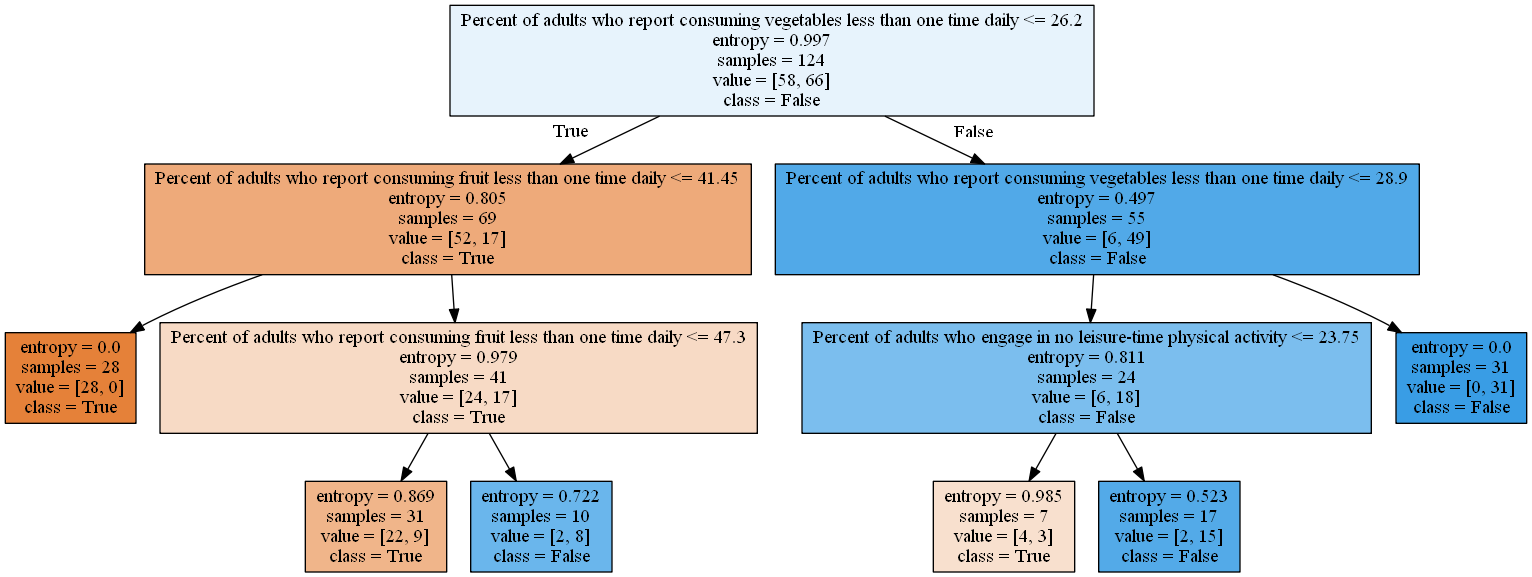

In [10]:
#Identify Target and Predictor attributes
Target = ObesityData4['Obesity_Over_Median']
Predictors = ObesityData4.drop(['Percent of adults aged 18 years and older who have an overweight classification',
                                'Percent of adults aged 18 years and older who have obesity',
                                'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
                                'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
                                'Obesity_Over_Median'], axis = 1)

#Split data into training and test sets

predict_train, predict_test, target_train, target_test = train_test_split(Predictors, Target, test_size = 0.2)

#Fit the tree to the data with a max depth of 3, using entropy as the criterion for making the model
DTree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
DTree = DTree.fit(predict_train, target_train)

#Visualize the decision tree

Tree_viz_data = tree.export_graphviz(DTree, feature_names = predict_train.columns, class_names = ['True','False'],
                                    filled = True, out_file =  None)
Tree_viz = pydotplus.graph_from_dot_data(Tree_viz_data)
Image(Tree_viz.create_png())

In [11]:
#Model Evaluation - Training Accuracy > Test Accuracy > Cross-validation Accuracy

Target_pred_by_train = DTree.predict(predict_train)  #Make predictions based on the tree
Target_pred_by_test = DTree.predict(predict_test)
training_accuracy = accuracy_score(target_train, Target_pred_by_train) #Calculate training accuracy
print('\t Training Accuracy: \t%.3f' % training_accuracy)
testing_accuracy = accuracy_score(target_test, Target_pred_by_test) #Calculate testing accuracy on validation set
print('\t Test Accuracy: \t%.3f' % testing_accuracy)

#Accuracy w/cross-validation - 5 folds
cvScore = np.mean(cross_val_score(DTree, predict_train, target_train, scoring = 'accuracy', cv=5)) 
print('\t 5-fold CV score: \t%.3f' % cvScore)

	 Training Accuracy: 	0.871
	 Test Accuracy: 	0.806
	 5-fold CV score: 	0.742


In [12]:
#k-Nearest Neighbors Modeling with k = 13

nn_model = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', p = 2)
nn_model.fit(predict_train, target_train)

target_from_train = nn_model.predict(predict_train)
target_from_test = nn_model.predict(predict_test)

train_accuracy = accuracy_score(target_train, target_from_train) #Calculate training accuracy
print('\t Training Accuracy: \t%.3f' % train_accuracy)
test_accuracy = accuracy_score(target_test, target_from_test) #Calculate testing accuracy on validation set
print('\t Test Accuracy: \t%.3f' % test_accuracy)
nn_cvScore = np.mean(cross_val_score(nn_model, predict_train, target_train, cv = 5))
print('\t 5-fold CV score: \t%.3f' % nn_cvScore)


	 Training Accuracy: 	0.798
	 Test Accuracy: 	0.839
	 5-fold CV score: 	0.782


For comparison purposes, the metric we are interested in is testing accuracy.  Without cross-validation,
test accuracy reported for the decision tree and nearest neighbors classifier are the metric of interest, and
the 5-fold CV score is that accuracy statistic using 5-fold cross-validation.  Looking at the metrics, we see
that the highest test accuracy is found using the decision tree classifier without cross-validation.

Both models delivered lower accuracy using cross-validation than without.  With 155 instances total, and using
20% split off for testing, the size of the partitions used for training might be getting too small to be
helpful in making useful models, at about 20 instances per partition.

Using those parameters for the two classifiers were largely arbitrary choices, those accuracy metrics
are really only valid under those circumstances.  We might find that a different algorithm produces more 
accurate predictions with a different depth to the tree, different tree-building metric, different number of
neighbors, or weighting the distance metrics, or other tuning parameters.

Reference:
Pittman, S. (2018) "CDC Data: Nutrition, Physical Activity, & Obesity - Obesity Trends in US "(Version 1)
    [Data set]. https://www.kaggle.com/spittman1248/cdc-data-nutrition-physical-activity-obesity